In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Replace this with the path to battdeg.py module in your system
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [4]:
# Import the module irtemp
import irtemp
import edge_detection
import pixel_analysis

## PART A:
### The temperature profile of the samples and plate is determined by detecting the edges, filling and labeling them, and monitoring the temperature at their centroids.

#### Use the function 'edge_detection.input_file' to load the input file

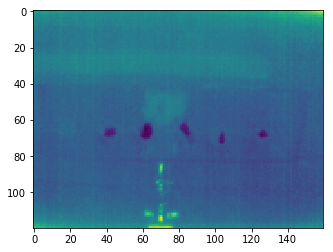

In [6]:
frames = edge_detection.input_file('../musicalrobot/data/PPA_Melting_6_14_19.tiff')
plt.imshow(frames[0])

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

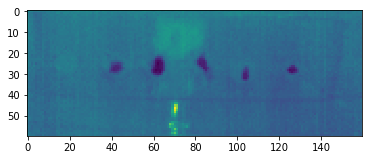

In [7]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[40:100])
plt.imshow(crop_frame[0])

#### Use the function edge_detection.centroid_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video

In [8]:
flip_frames, regprops, s_temp, p_temp = edge_detection.centroid_temp(crop_frame,5)

#### Plotting the locations at which the temperature was recorded

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

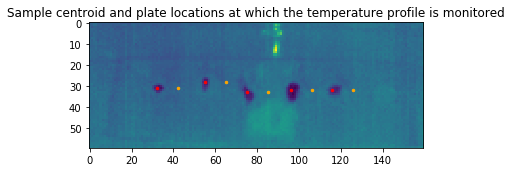

In [9]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(flip_frames[0])
plt.scatter(regprops[0]['Plate_coord'],regprops[0]['X'],c='orange',s=6)
plt.scatter(regprops[0]['Y'],regprops[0]['X'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

Text(0.5, 1.0, 'Temperature of the sample against the temperature of the plate')

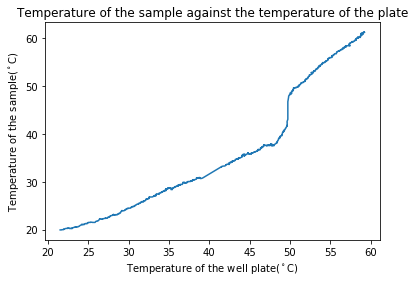

In [8]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(p_temp[1],s_temp[1])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')

## Part B:
* The temperature profile of the samples and the plate is obtained by summing the pixel values over individual rows and columns, finding the troughs in the array of all the column and row sums.
* The temperature profile is then obtained by monitoring the temperature value at the intersection of peak values in the column and row sums. 

#### Load the input file as frames

In [10]:
pixel_frames = edge_detection.input_file('../musicalrobot/data/CHCl_CA_DES_5_31_19.tiff')

#### Use the function pixel_analysis.pixel_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video.

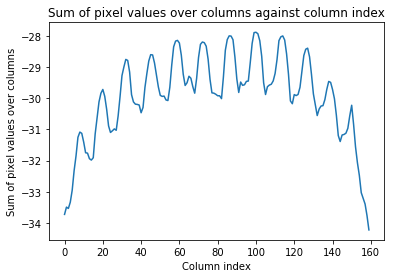

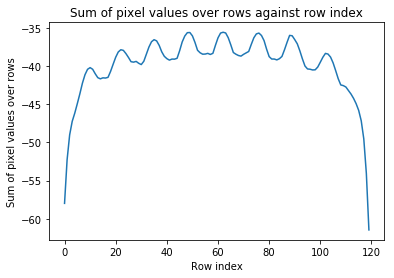

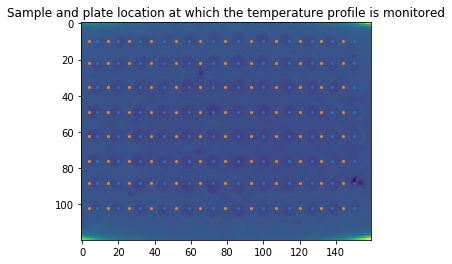

In [11]:
temp, plate_temp = pixel_analysis.pixel_temp(pixel_frames,len(pixel_frames),n_columns = 12,n_rows = 8)

Text(0.5, 1.0, 'Temperature of the sample against the temperature of the plate')

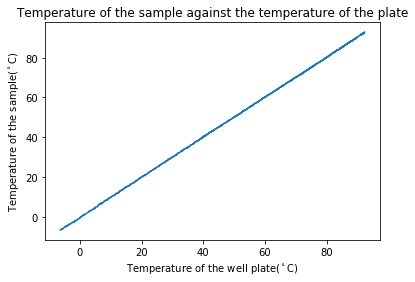

In [12]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(temp[1],plate_temp[1])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')